
# Outlines:
- [0-Introduction](#0)
- [1- Import Data and Packages](#1)
- [2- Feature Extraction](#2)
- [3- EDA](#3)
    - [3.1 - Scatter matrix](#3.1)
    - [3.2 - Univariate Analysis](#3.2)
    - [3.3 - Plotting Colinearity](#3.3)
    - [3.4 - Numerical Columns over the date columns](#3.4)
- [4- Preprocessing and Transformers](#4)
    - [4.1- Pipeline](#4.1)
- [5- Feature Importance](#5)
- [6- Modeling](#6)
    - [6.1 - Plot Model Scores](#6.1)
    - [6.2 - Final Model](#6.2)
    - [6.3 - Cross-Validation Scores](#6.3)
- [7- Plot Real/Predicted/Actual Power](#7)

<a name="0"></a>
# Intoduction

<div style="font-size:120%;"><strong>In contemporary times, windmills or more accurately wind turbines,have become essential players in the global energy landscape.</strong></div>


<div style="font-size:110%;">They operate on a simple principle: the kinetic energy of the wind turns blades attached to a rotor,which then drives a generator to produce electricity</div>


<div style="font-size:110%;">This clean and renewable energy source has seen exponential growth,with wind power capacity expanding rapidly across continents</div>

<br>
<div style="font-size:110%;"><em>The environmental benefits of windmills are significant.They produce no greenhouse gas emissions or air pollutants during operation,making them crucial in mitigating climate change and reducing reliance on fossil fuels.</em></div>

<div style="font-size:110%;">Moreover, wind energy is abundant and inexhaustible,</div>
<div style="font-size:110%;">offering a dependable source of power for generations to come.</div>


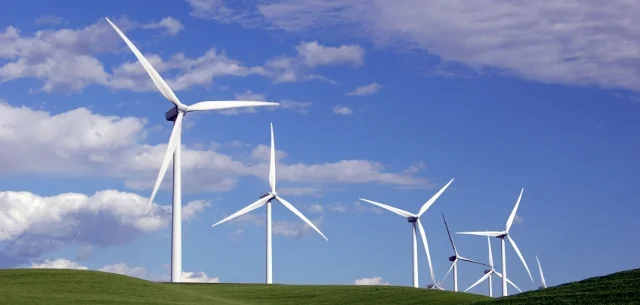!

### About Dataset

In Wind Turbines, SCADA Systems measure and save data such as wind speed, wind direction, generated power, etc. at 10-minute intervals. This file contains data from a wind turbine's SCADA system that is operational and generating power in Turkey.

#### Content

The data in the file includes:

- **Date/Time (for 10-minute intervals)**
- **LV ActivePower (kW):** The power generated by the turbine for that moment
- **Wind Speed (m/s):** The wind speed at the hub height of the turbine (the wind speed that the turbine uses for electricity generation)
- **Theoretical Power Curve (KWh):** The theoretical power values that the turbine generates with that wind speed, which is provided by the turbine manufacturer
- **Wind Direction (°):** The wind direction at the hub height of the turbine (wind turbines automatically turn to this direction)


<a name="1"></a>
# 1 - Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
 df=pd.read_csv('/kaggle/input/wind-turbine-scada-dataset/T1.csv')
 df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
#There is negative values in the actual power column
count_negative_values = (df['LV ActivePower (kW)'] < 0).sum()
count_negative_values

57

In [7]:
df.loc[df['LV ActivePower (kW)'] < 0, 'LV ActivePower (kW)'] = 0

<a name="2"></a>
# 2 - Feature Extraction

### Extract new features from the Date/Time Column

In [8]:
#Save a copy for the pipeline and split it
df_copy=df.copy()

In [9]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%d %m %Y %H:%M')

In [10]:
df['Week']=df['Date/Time'].dt.day // 7 + 1

df['Week'].value_counts()

Week
3    11948
4    11809
2    11645
1     9924
5     5204
Name: count, dtype: int64

In [11]:
df['Month']=df['Date/Time'].dt.month

In [12]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df['Seasons'] = df['Month'].map(seasons_dict)

In [13]:
df['Day']=df['Date/Time'].dt.day

In [14]:
df['Hour']=df['Date/Time'].dt.hour+1

In [15]:
df.drop(columns=['Date/Time'],inplace=True)

In [16]:
df.isna().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Week                             0
Month                            0
Seasons                          0
Day                              0
Hour                             0
dtype: int64

### Split The Data

In [17]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_copy_train,df_copy_test=train_test_split(df_copy,test_size=0.2,random_state=42)

<a name="3"></a>
# 3 - EDA

In [18]:
#Intialize Numerical and Date Columns
date_col=['Week','Month','Seasons','Hour','Day']
num_col=['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)',]


array([[<Axes: title={'center': 'LV ActivePower (kW)'}>,
        <Axes: title={'center': 'Wind Speed (m/s)'}>],
       [<Axes: title={'center': 'Theoretical_Power_Curve (KWh)'}>,
        <Axes: title={'center': 'Wind Direction (°)'}>]], dtype=object)

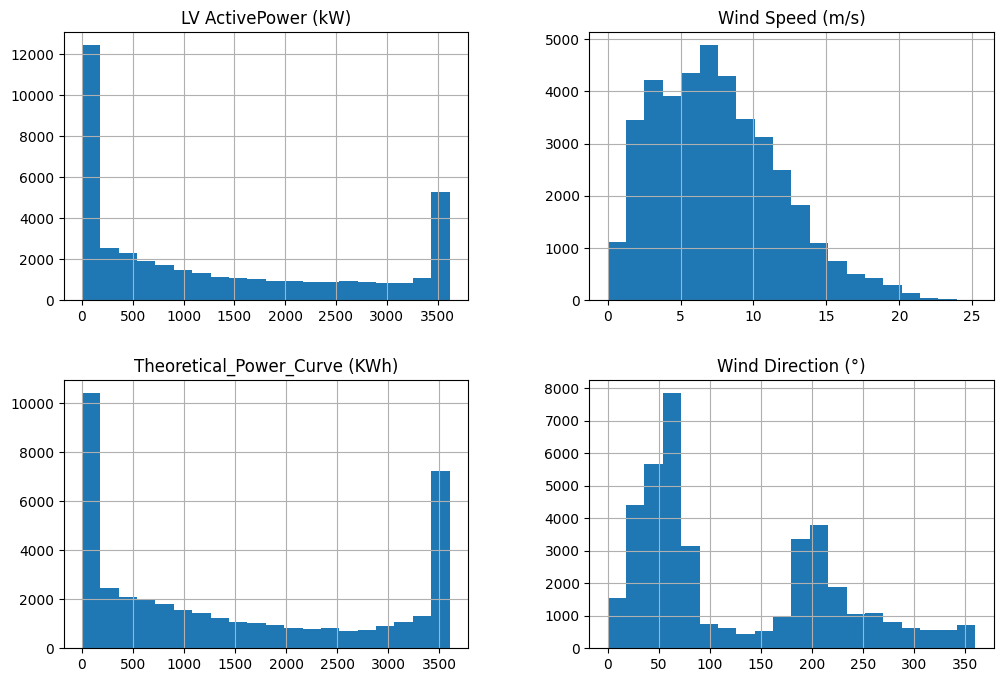

In [19]:
df_train[num_col].hist(bins=20,figsize=(12,8))

<a name="3.1"></a>
### 3.1 - Scatter matrix

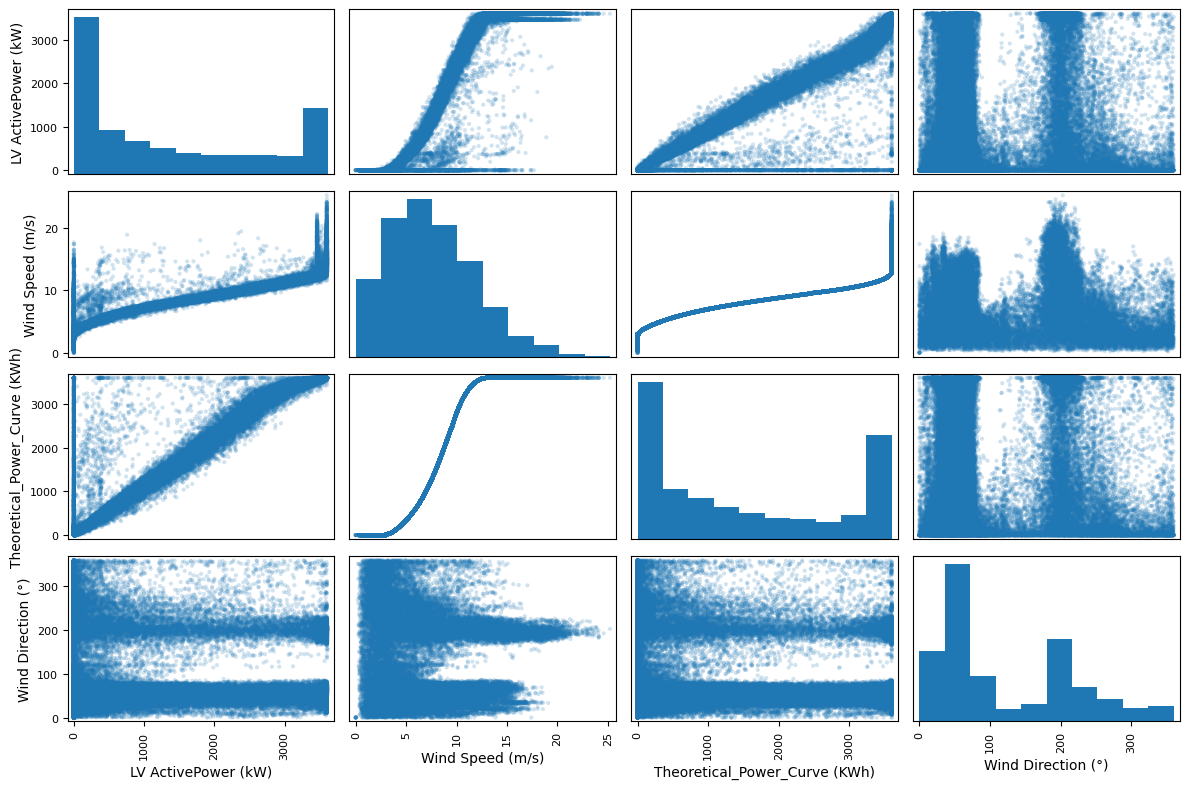

In [20]:
pd.plotting.scatter_matrix(df[num_col], alpha=0.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

- **Comments:**
    - from the scatter plot between `wind speed` and `Theoritical Power Curve`, we see that Wind Turbines Systems can't generate any power if the wind speed is less than 4 m/s
    - when the wind speed is larger than 4 m/s to 11 m/s, the relation between them are linear meaning that increasing the wind speed, allows turbines to generate more power
    - after the wind speed passes 11 m/s, the power generated is saturated on 3600 KWh

<a name="3.2"></a>
### 3.2 - Univariate Analysis

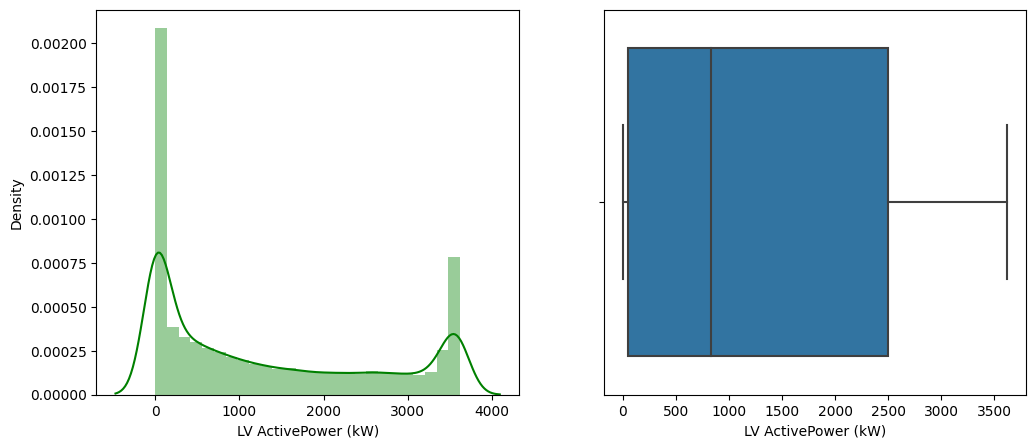

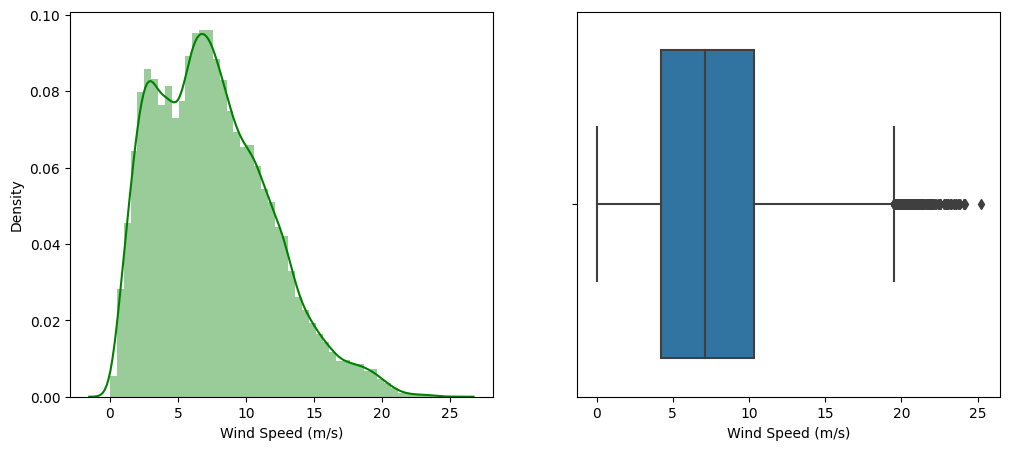

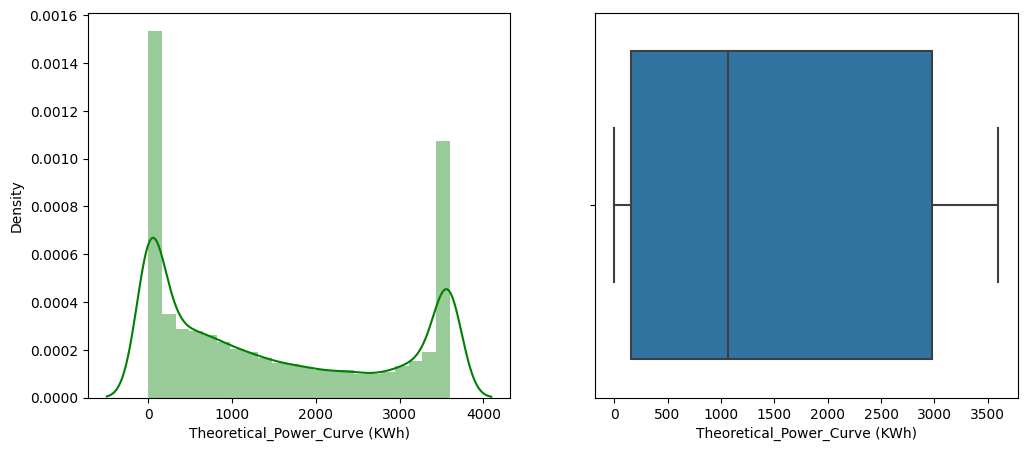

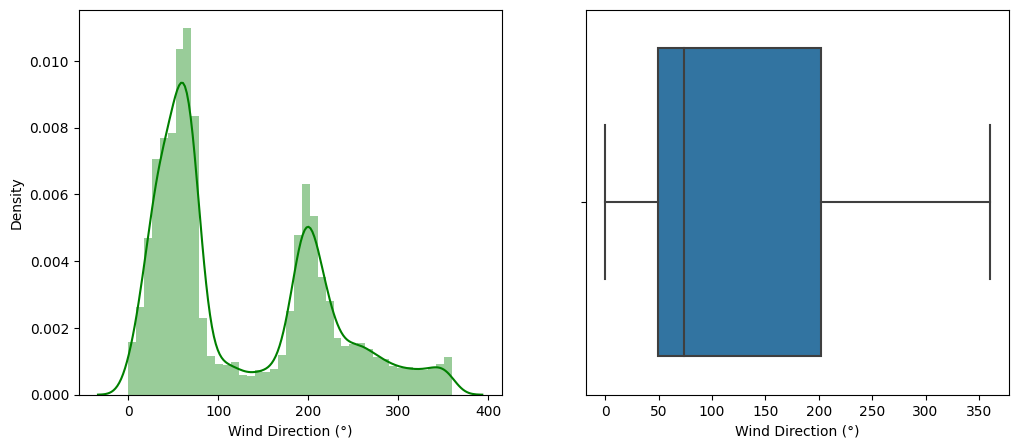

In [21]:
for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.distplot(df_train[col], ax=ax[0] ,color='green')  
    sns.boxplot(x=df_train[col], ax=ax[1])
    plt.show()

<a name="3.3"></a>
### 3.3 - Plotting Colinearity

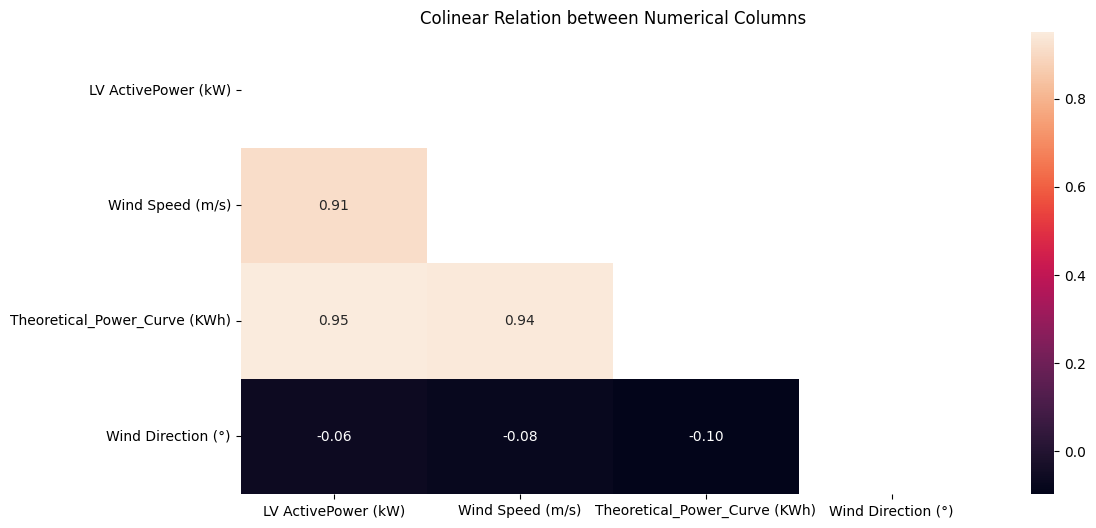

In [22]:
corr = df_train[num_col].corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
plt.title('Colinear Relation between Numerical Columns')
sns.heatmap(corr, annot=True,mask=mask, fmt='.2f')
sns.color_palette("magma", as_cmap=True)
plt.show()

<a name="3.4"></a>
## 3.4 - Numerical Columns over the date columns

<h3>Numerical Columns over the Weeks<h3>

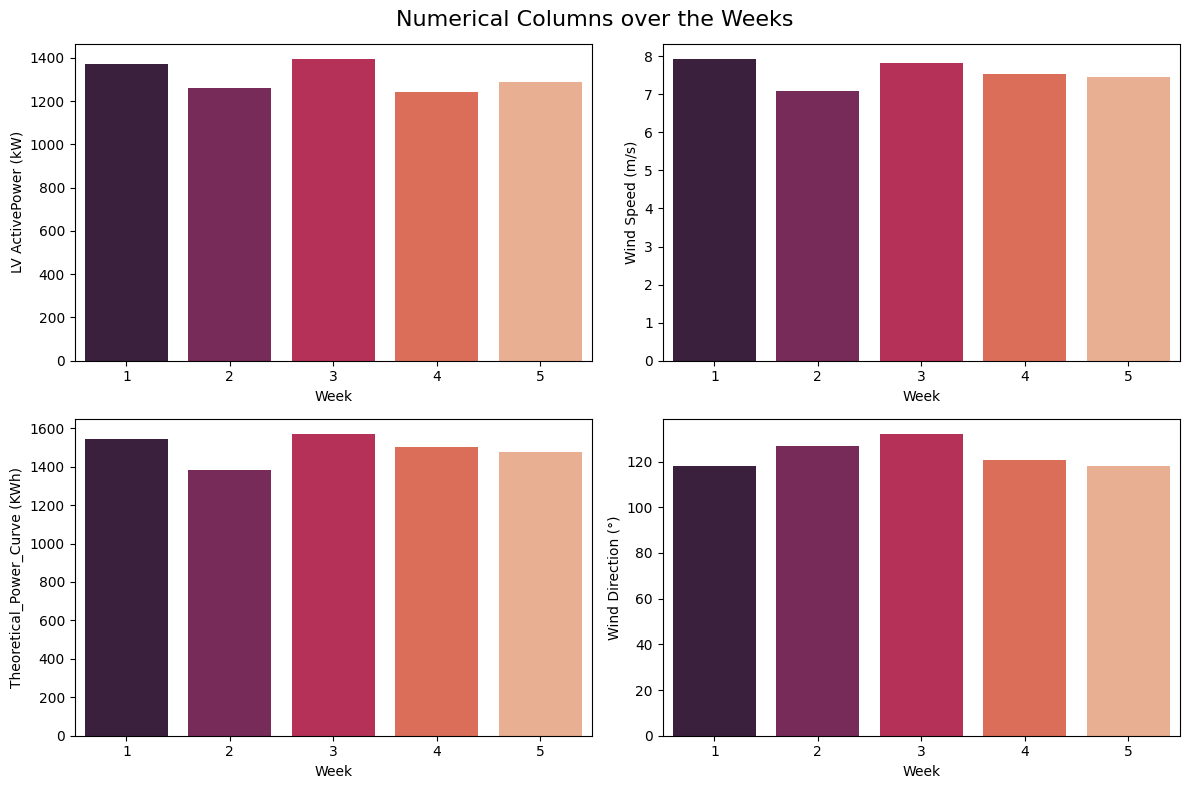

In [23]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=df_train['Week'],y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Weeks', fontsize=16)
plt.tight_layout()
plt.show() 

<h3>Numerical Columns for each Month<h3>

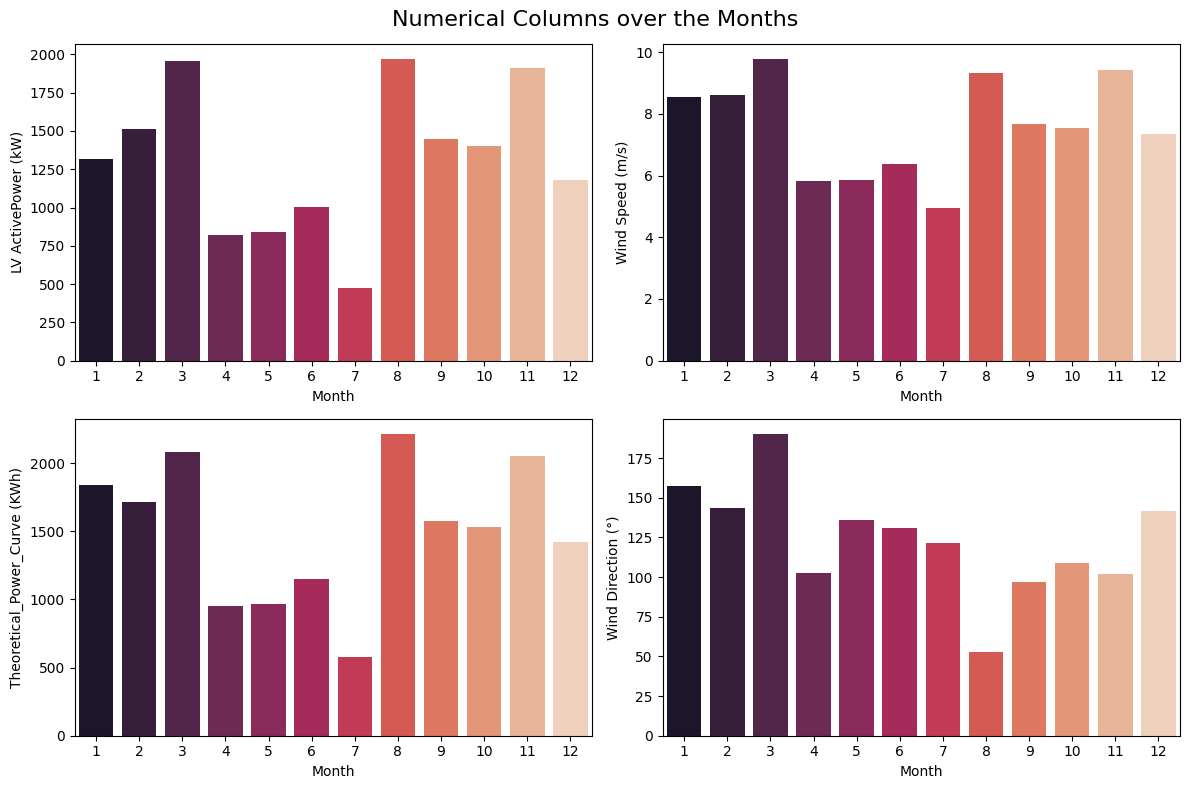

In [24]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=df_train['Month'],y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Months', fontsize=16)
plt.tight_layout()
plt.show() 

<h3>Numerical Columns over the Seasons</h3>

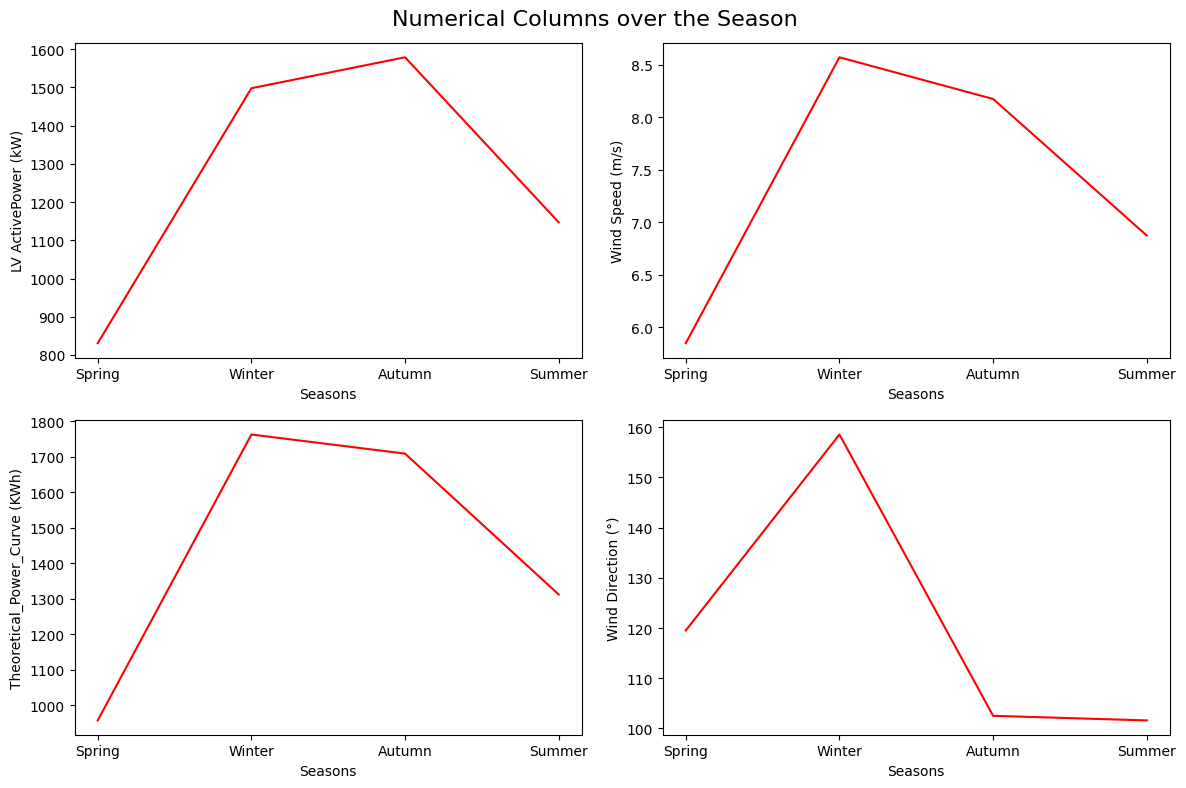

In [25]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Seasons',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],ci=None,color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.tight_layout()
plt.show() 

<a name="4"></a>
# 4 - Preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestRegressor

<h3>Split the Target and Label Columns<h3>

In [27]:
X_train,y_train,X_test,y_test=df_copy_train.drop(columns='LV ActivePower (kW)'),df_copy_train['LV ActivePower (kW)'],df_copy_test.drop(columns='LV ActivePower (kW)'),df_copy_test['LV ActivePower (kW)']


In [28]:
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

The Shape of X_train is : (40424, 4)
The Shape of y_train is : (40424,)
The Shape of X_test is : (10106, 4)
The Shape of y_test is : (10106,)


<a name="4.1"></a>
## 4.1 - Custom Transformers & Pipeline

In [29]:
class StandardScaleTransform(BaseEstimator, TransformerMixin):
    """
    A transformer class to apply standard scaling to specified columns in a Pandas DataFrame.

    Parameters
    ----------
    cols : list of str
        The names of the columns to apply standard scaling to.
    """
    def __init__(self, cols):
        self.cols = cols
        self.scaler_ = None

    def fit(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self.transform(X)

In [30]:
class DataFrameImputer(TransformerMixin, BaseEstimator):
    """
    A class to impute missing values in a Pandas DataFrame using a combination of median, knn, and most frequent
    imputers on specified columns.

    Parameters:
    -----------
    median_cols : list of str, optional (default=None)
        Columns to impute missing values using the median imputer.
    knn_cols : list of str, optional (default=None)
        Columns to impute missing values using the KNN imputer.

    Returns:
    --------
    X_imputed : pandas.DataFrame
        A DataFrame with imputed missing values.
    """
    def __init__(self, median_cols=None, knn_cols=None):
        self.median_cols = median_cols
        self.knn_cols = knn_cols
    
    def fit(self, X, y=None):
        self.median_imputer = SimpleImputer(strategy='median')
        self.knn_imputer = KNNImputer()

        if self.median_cols is not None:
            self.median_imputer.fit(X[self.median_cols])
        if self.knn_cols is not None:
            self.knn_imputer.fit(X[self.knn_cols])
        return self
    
    def transform(self, X):
        X_imputed = X.copy()
        if self.median_cols is not None:
            X_median = pd.DataFrame(self.median_imputer.transform(X[self.median_cols]), 
                                    columns=self.median_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.median_cols, axis=1), X_median], axis=1)
        if self.knn_cols is not None:
            X_knn = pd.DataFrame(self.knn_imputer.transform(X[self.knn_cols]), 
                                 columns=self.knn_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.knn_cols, axis=1), X_knn], axis=1)
        return X_imputed
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


In [31]:
class DateExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, date_cols):
        self.date_cols = date_cols
         

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        extracted_features = []
        for col in self.date_cols:
            dates = pd.to_datetime(X[col], format='%d %m %Y %H:%M')
            for date in dates:
                month_val = date.month
                week_val = date.day // 7 + 1
                day_val = date.day
                hour_val = date.hour + 1
                # Determining season based on month
                if month_val in [3, 4, 5]:
                    season_val = 'Spring'
                elif month_val in [6, 7, 8]:
                    season_val = 'Summer'
                elif month_val in [9, 10, 11]:
                    season_val = 'Autumn'
                else:
                    season_val = 'Winter'
                extracted_features.append([month_val, week_val, day_val, season_val, hour_val])

        # Convert the extracted features list to a DataFrame
        X_date = pd.DataFrame(extracted_features, columns=['Month', 'Week', 'Day', 'Season', 'Hour'])
        X_new=pd.concat([X.reset_index(drop=True),X_date],axis=1)
        return X_new
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [32]:
class OutlierThresholdTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column, q1=0.25, q3=0.75):
        self.column = column
        self.q1 = q1
        self.q3 = q3
    def outlier_threshhold(self, dataframe, column):
        Q1 = dataframe[column].quantile(self.q1)
        Q3 = dataframe[column].quantile(self.q3)
        iqr = Q3 - Q1
        up_limit = Q3 + 1.5 * iqr
        low_limit = Q1 - 1.5 * iqr
        return low_limit, up_limit

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.column:
            low_limit, up_limit = self.outlier_threshhold(X_copy, col)
            X_copy.loc[(X_copy[col] < low_limit), col] = low_limit
            X_copy.loc[(X_copy[col] > up_limit), col] = up_limit
        return X_copy

    def fit_transform(self, X, y=None):
        return self.transform(X)

    

In [33]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer that drops specified columns from a DataFrame.

    Parameters
    ----------
    columns : list
        A list of column names to be dropped.
    return
    ------
        dataframe with dropped columns
    """
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.columns is None:
            return X
        else:
            return X.drop(self.columns,axis=1)

In [34]:
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):

    """
    A transformer class to apply one-hot encoding to specified columns in a Pandas DataFrame.

    Parameters
    ----------
    columns : list
        A list of column names to encode.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with the specified columns one-hot encoded.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.unique_values = {} 
        self.feature_names_ = None

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns.tolist() 
        self.unique_values = {col: X[col].unique() for col in self.columns}
        self.feature_names_ = self._get_feature_names()
        return self
    def _get_feature_names(self):
        feature_names = []
        for col in self.columns:
            for value in self.unique_values[col]:
                feature_names.append(f"{col}_{value}")
        return feature_names
    def transform(self, X):
        X_transformed = pd.DataFrame(index=X[self.columns].index)
                                     
        for col in self.columns:
            for value in self.unique_values[col]:
                X_transformed[f"{col}_{value}"] = (X[col] == value).astype(int)
        
        X = pd.concat([X, X_transformed], axis=1)
        return X.drop(columns=['Season'])
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [35]:
class LabelEncodeColumns(BaseEstimator, TransformerMixin):
    """
    A transformer class to encode categorical columns using LabelEncoder.

    Parameters
    ----------
    columns : list of str
        The names of the columns to be encoded.

    return
    ------
        encoded feature
    """
    def __init__(self, columns):
        self.columns = columns
        self.encoders_ = {}

    def fit(self, X, y=None):
        for col in self.columns:
            encoder = LabelEncoder()
            encoder.fit(X[col])
            self.encoders_[col] = encoder
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, encoder in self.encoders_.items():
            X_copy[col] = encoder.transform(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)


In [36]:
class FullPipeline1:
    def __init__(self) :
        self.date_cols=['Date/Time']
        self.numerical_cols=['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)','Week','Month','Hour','Day']
        self.MLE_cols=['Season']
        self.full_pipeline=Pipeline([
            ('extract_date',DateExtractor(date_cols=self.date_cols)),
            ('label_encode', CustomOneHotEncoder(columns=self.MLE_cols)),
            #('label_encode', LabelEncodeColumns(columns=self.MLE_cols)),
            ('impute_num',DataFrameImputer(knn_cols=self.numerical_cols)),
            ('remove_outlier',OutlierThresholdTransformer(column=self.numerical_cols)),
            ('scale', StandardScaleTransform(cols=self.numerical_cols)),
            ('drop', DropColumnsTransformer(columns=self.date_cols)),
           
        ])
    def fit_transform(self, X_train):
        X_train = self.full_pipeline.fit_transform(X_train)
        return X_train
    def transform(self, X_test):
        X_test = self.full_pipeline.transform(X_test)
        return X_test
f1=FullPipeline1()
X_1_train_f1=f1.fit_transform(X_train)
X_1_test_f1=f1.transform(X_test)

In [37]:
X_1_train_f1.head()

,Season_Spring,Season_Winter,Season_Autumn,Season_Summer,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Hour,Day
0,1,0,0,0,-1.131041,-1.091661,0.600542,-0.641252,-0.738439,-0.800917,-0.533974
1,0,1,0,0,-0.616778,-0.852852,-0.007299,-1.424629,1.605546,-0.800917,-1.569184
2,0,0,1,0,1.231326,1.531968,0.937698,1.708881,1.019550,0.928508,1.651468
3,0,0,0,1,-0.110304,-0.318188,-0.744266,-1.424629,-0.152443,-0.368561,-1.684207
4,1,0,0,0,-0.303991,-0.564102,-0.869168,1.708881,-1.031437,0.352033,1.421421


<a name="5"></a>
# 5 - Feature Importance

In [38]:
#Create and train a Random Forest regressor
model=RandomForestRegressor(random_state=42)
model.fit(X_1_train_f1,y_train)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_1_train_f1.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [39]:
feature_importance_df

,Feature,Importance
4,Wind Speed (m/s),0.465842
5,Theoretical_Power_Curve (KWh),0.455181
6,Wind Direction (°),0.025083
10,Day,0.023723
8,Month,0.013415
9,Hour,0.008392
1,Season_Winter,0.003745
7,Week,0.003493
3,Season_Summer,0.000561
2,Season_Autumn,0.000321


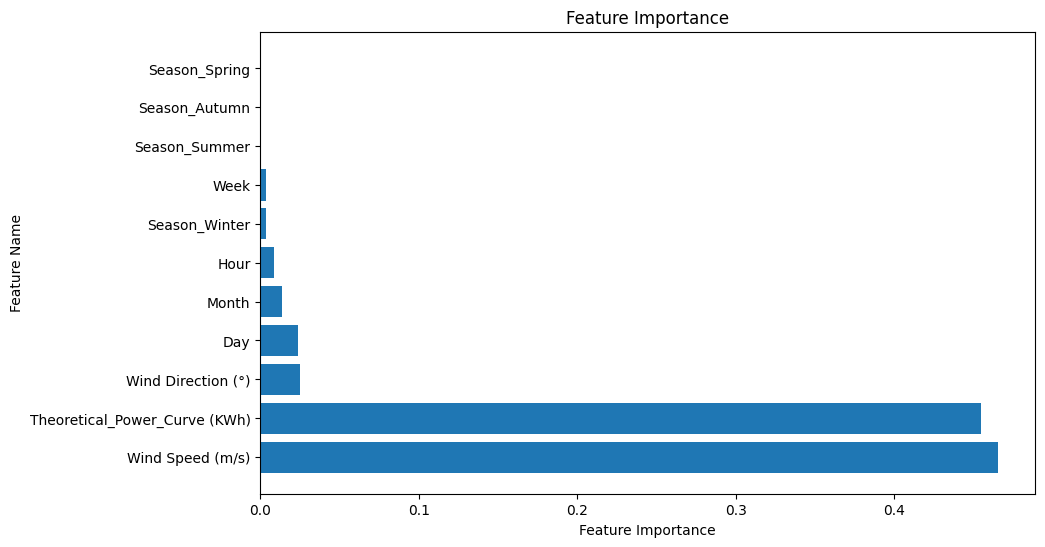

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

<a name="6"></a>
# 6 - Modeling

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

In [42]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42),
    CatBoostRegressor(random_state=42,verbose=False)
]

for model in models:
    model.fit(X_1_train_f1 , y_train)
    y_pred = model.predict(X_1_test_f1)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))

In [43]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df.sort_values("R2_score", ascending = False)

,Model-Name,R2_score,RMSE
9,CatBoostRegressor,98.253759,172.616020
7,XGBRegressor,98.145471,177.887655
4,ExtraTreesRegressor,97.760676,195.473301
2,RandomForestRegressor,97.399257,210.657873
6,DecisionTreeRegressor,95.528001,276.235730
0,GradientBoostingRegressor,94.777728,298.509905
8,XGBRFRegressor,94.507926,306.123857
3,LinearRegression,90.607163,400.338525
1,SVR,88.491109,443.144887
5,AdaBoostRegressor,86.857825,473.546488


<a name="6.1"></a>
## 6.1 - Plot Model Scores

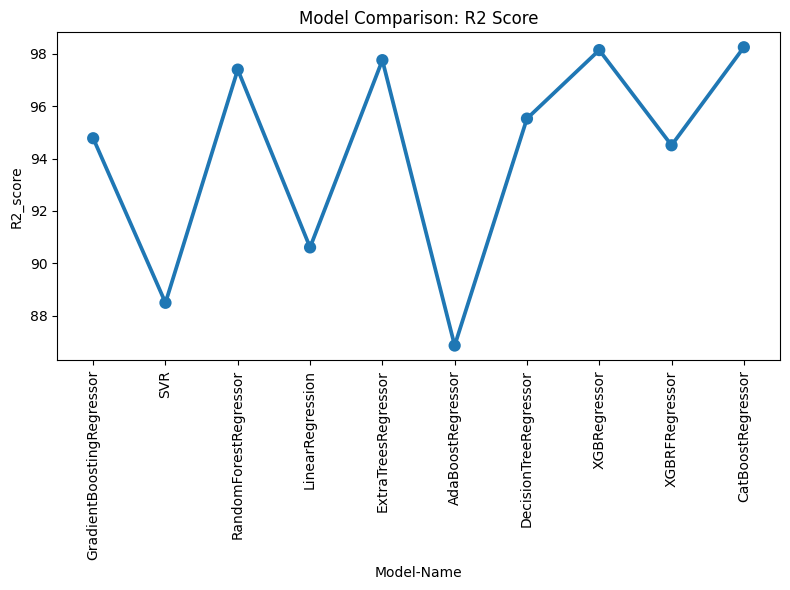

In [44]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

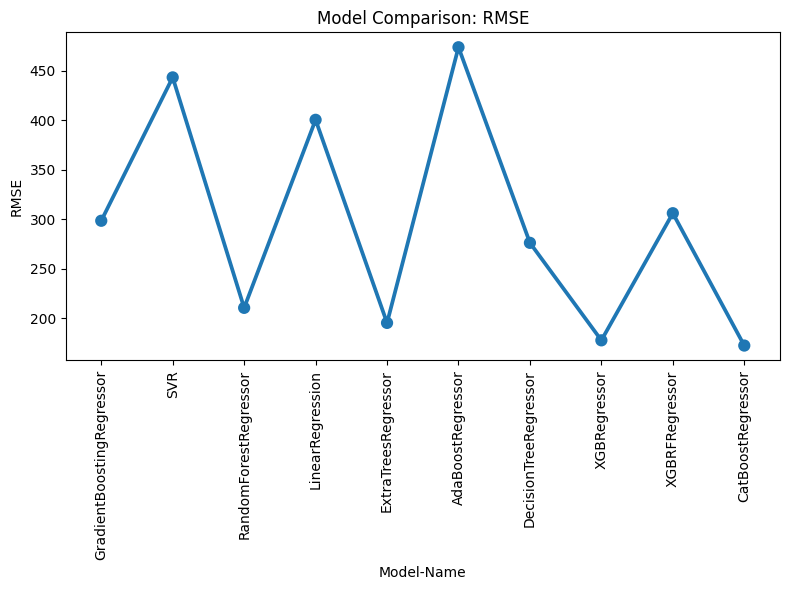

In [45]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

<a name="6.2"></a>
## 6.2 - Final Model

In [46]:
fm=CatBoostRegressor(random_state=42)

Fine Tune your model

In [47]:
#Prepare a set of hyperparameters to search over
param_grid = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'iterations': [100, 200, 300, 400, 500],  # Equivalent to n_estimators
    'depth': [3, 5, 7, 9],  # Equivalent to max_depth
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bylevel': np.linspace(0.5, 1.0, 6),  # Equivalent to colsample_bytree
    'l2_leaf_reg': np.linspace(0.01, 1.0, 10),  # Equivalent to reg_lambda
    'min_child_samples': [1, 5, 10, 15],  # Equivalent to min_child_weight 
}


In [48]:
#Create the GridSearchCV object and specify the number of folds for cross-validation
from sklearn.metrics import make_scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
random_search = RandomizedSearchCV(estimator=fm, param_distributions=param_grid, n_iter=50, scoring=rmse_scorer , n_jobs=-1,error_score='raise')

In [49]:
#Fit the RandmoizedSearch object to your training data:
random_search.fit(X_1_train_f1, y_train, verbose=False)

RandomizedSearchCV(error_score='raise',
                   estimator=<catboost.core.CatBoostRegressor object at 0x7e23baf48ac0>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'depth': [3, 5, 7, 9],
                                        'iterations': [100, 200, 300, 400, 500],
                                        'l2_leaf_reg': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'min_child_samples': [1, 5, 10, 15],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   scoring=make_scorer(rmse, greater_is_better=False))

In [50]:
#Inspect the best parameters and score:
best_params = random_search.best_params_
best_score = random_search.best_score_
print('Best Parameters: ', best_params)
print('Best RMSE: ', best_score)

Best Parameters:  {'subsample': 0.8, 'min_child_samples': 10, 'learning_rate': 0.23555555555555557, 'l2_leaf_reg': 0.23, 'iterations': 500, 'depth': 9, 'colsample_bylevel': 0.6}
Best RMSE:  -149.06185600740503


In [51]:
#Use the best parameters to re-train your model and make predictions on the test data:
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_1_train_f1, y_train,verbose=False)
y_pred = best_model.predict(X_1_test_f1)

In [67]:
import joblib
joblib.dump(f1, 'one_hot_pipeline.pkl')

['one_hot_pipeline.pkl']

In [68]:
joblib.dump(best_model, 'one_hot_model.pkl')

['one_hot_model.pkl']

In [52]:
y_test1=y_test.to_numpy()

In [53]:
#Evaluate the performance of the best model using your preferred metric
r2 = r2_score(y_test1, y_pred )
print('R2 Score: ', r2)

R2 Score:  0.9873154165642858


In [63]:
sample_data = {
    'Date/Time': ['31 12 2018 23:10'],
    'Wind Speed (m/s)': [11.404030],
    'Theoretical_Power_Curve (KWh)': [3397.190793],
    'Wind Direction (°)': [80.502724]
}
f_data = pd.DataFrame(sample_data)
f_data1=f1.transform(f_data)
best_model.predict(f_data1)

array([2981.74226482])

<a name="6.3"></a>
## 6.3 - Cross-Validation Scores

In [ ]:
cross_val=cross_val_score(best_model,X_1_test_f1,y_test,scoring=rmse_scorer ,cv=20,verbose=False)
print(cross_val)

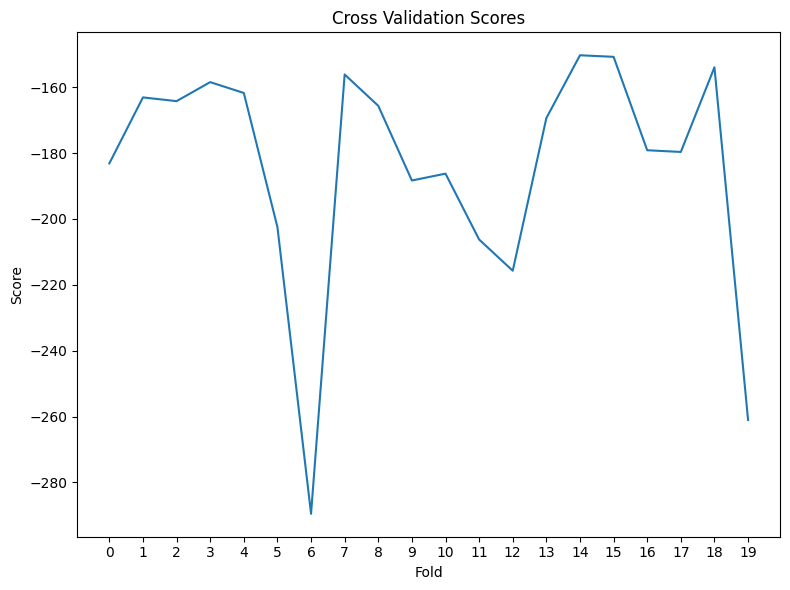

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val)
plt.title("Cross Validation Scores")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(np.arange(0,20))
plt.tight_layout()
plt.show()

In [57]:
print(cross_val.max())

-150.27675383041213


In [58]:
data_new = pd.DataFrame({'LV ActivePower (kW)': y_test})
data_new['Predictions'] = y_pred
data_new["Theoretical_Power_Curve (KWh)"] = df["Theoretical_Power_Curve (KWh)"]

data_new.head()

,LV ActivePower (kW),Predictions,Theoretical_Power_Curve (KWh)
8057,3348.910889,3224.844236,3452.918718
8059,2647.506104,2464.949016,2989.120313
50250,0.000000,-70.286472,779.117347
14774,1334.573975,1301.156437,1502.728868
49374,533.002808,520.327160,593.890170


<a name="7"></a>
## 7 - Plot Predicted/Real/Theoritical Power

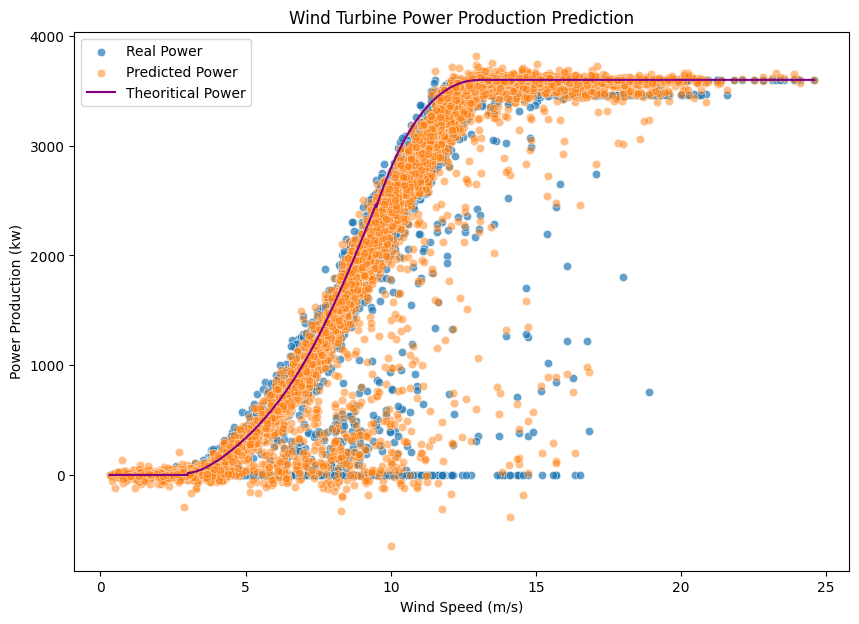

In [59]:
# Visualizing real, theoritical and predicted power production
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Wind Speed (m/s)'], y=data_new['LV ActivePower (kW)'],alpha=0.7, label= 'Real Power')
sns.scatterplot(x=df['Wind Speed (m/s)'], y=data_new['Predictions'], alpha=0.5, label='Predicted Power', marker='o')
sns.lineplot(x=df['Wind Speed (m/s)'], y=data_new["Theoretical_Power_Curve (KWh)"], label='Theoritical Power',color='purple')
plt.title('Wind Turbine Power Production Prediction')
plt.ylabel('Power Production (kw)')
plt.legend()

the model fits better to the `real power` production, than the `theoritical power` production curve.